In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, path, makedirs
from os.path import isfile, join
from sklearn.metrics import accuracy_score
import shutil

print(cv2.__version__)

3.4.8


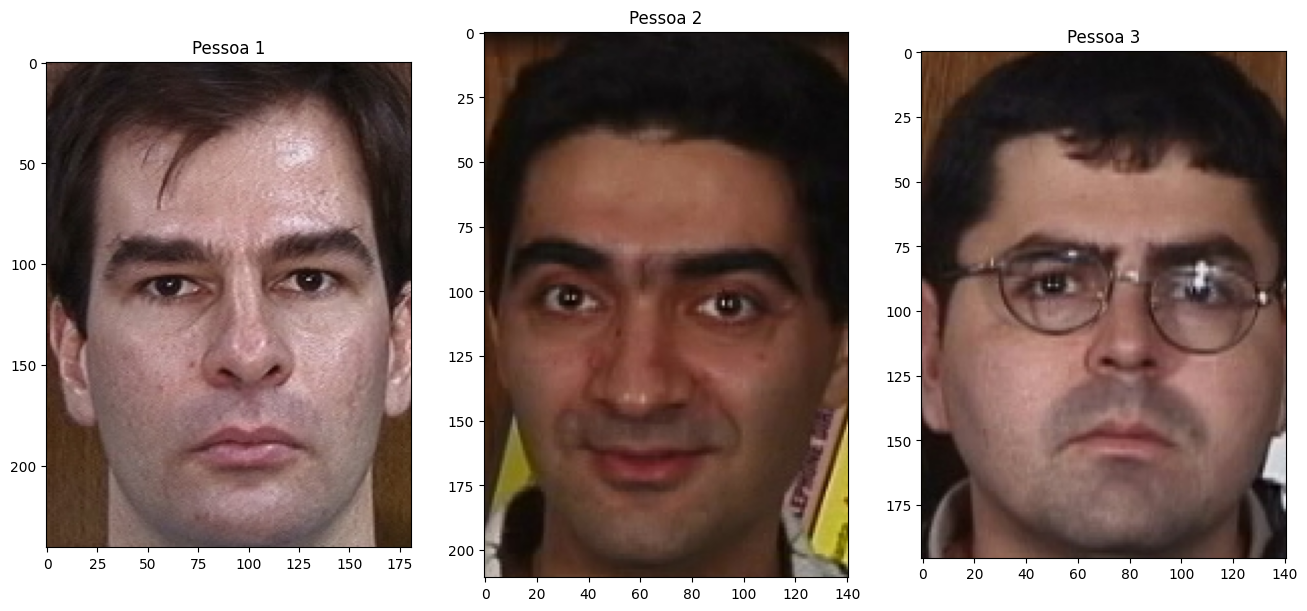

In [2]:
imagem_face_01 = cv2.imread("data/images/cropped_faces/s01_01.jpg")
imagem_face_01 = cv2.cvtColor(imagem_face_01, cv2.COLOR_BGR2RGB)

imagem_face_02 = cv2.imread("data/images/cropped_faces/s02_01.jpg")
imagem_face_02 = cv2.cvtColor(imagem_face_02, cv2.COLOR_BGR2RGB)

imagem_face_03 = cv2.imread("data/images/cropped_faces/s03_01.jpg")
imagem_face_03 = cv2.cvtColor(imagem_face_03, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Pessoa 1")
plt.imshow(imagem_face_01)
plt.subplot(1,3,2)
plt.title("Pessoa 2")
plt.imshow(imagem_face_02)
plt.subplot(1,3,3)
plt.title("Pessoa 3")
plt.imshow(imagem_face_03)

In [3]:
print(imagem_face_01.shape)
print(imagem_face_02.shape)
print(imagem_face_03.shape)

(241, 181, 3)
(211, 141, 3)
(196, 141, 3)


In [4]:
faces_caminho = "data/images/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile (join(faces_caminho, f))]
print(len(lista_arq_faces))
print(lista_arq_faces[0])

750
s01_01.jpg


In [5]:
faces_path_treino = "data/images/treino/"
faces_path_teste = "data/images/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]

    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [6]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [7]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile (join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile (join(faces_path_teste, f))]

In [8]:
print(lista_faces_treino[0])
print(lista_faces_teste[0])

s01_01.jpg
s01_11.jpg


In [9]:
dados_treinamento, sujeitos = [], []
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [10]:
print(len(dados_treinamento), len(sujeitos))

500 500


In [11]:
dados_teste, sujeitos_teste = [], []
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [12]:
print(len(dados_teste), len(sujeitos_teste))

250 250


Text(0.5, 1.0, '1')

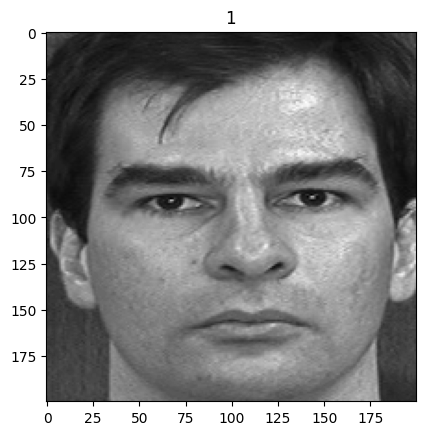

In [13]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeitos[0])

Text(0.5, 1.0, '1')

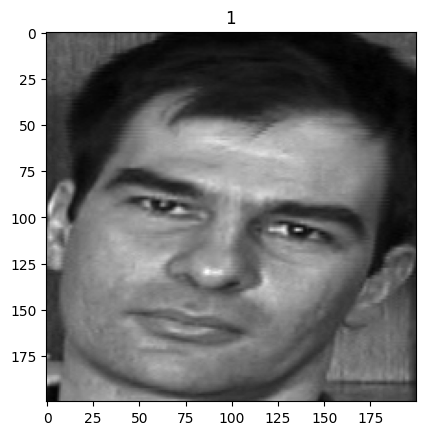

In [14]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

In [15]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [16]:
modelo_eigenface = cv2.face.EigenFaceRecognizer_create()

In [17]:
modelo_eigenface.train(dados_treinamento, sujeitos)

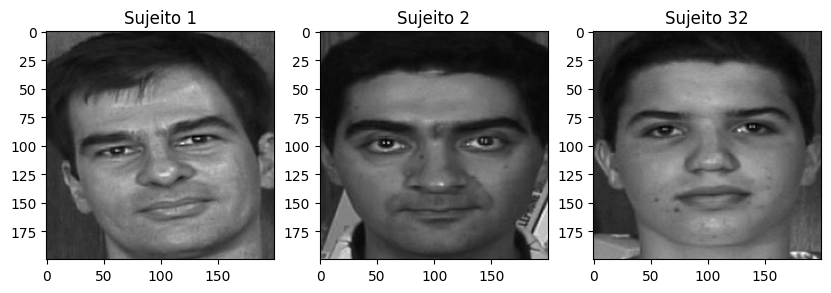

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title("Sujeito " + str(sujeitos_teste[1]))
plt.imshow(dados_teste[1], cmap="gray")

plt.subplot(1,3,2)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(1,3,3)
plt.title("Sujeito " + str(sujeitos_teste[155]))
plt.imshow(dados_teste[155], cmap="gray")

In [19]:
predicao = modelo_eigenface.predict(dados_teste[1])
predicao

(1, 4489.914540187163)

In [20]:
predicao = modelo_eigenface.predict(dados_teste[6])
predicao

(32, 4817.750027543926)

In [25]:
predicao = modelo_eigenface.predict(dados_teste[155])
predicao

(32, 2517.101448115378)

In [26]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [27]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

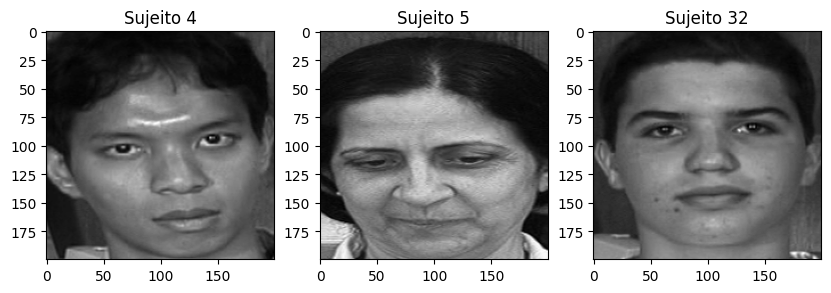

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title("Sujeito " + str(sujeitos_teste[15]))
plt.imshow(dados_teste[15], cmap="gray")

plt.subplot(1,3,2)
plt.title("Sujeito " + str(sujeitos_teste[20]))
plt.imshow(dados_teste[20], cmap="gray")

plt.subplot(1,3,3)
plt.title("Sujeito " + str(sujeitos_teste[155]))
plt.imshow(dados_teste[155], cmap="gray")

In [32]:
predicao = modelo_fisherfaces.predict(dados_teste[15])
predicao

(32, 860.7817814894929)

In [33]:
predicao = modelo_fisherfaces.predict(dados_teste[20])
predicao

(14, 1406.817370956173)

In [34]:
predicao = modelo_fisherfaces.predict(dados_teste[155])
predicao

(32, 548.856580419776)

In [36]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [37]:
modelo_lbph.train(dados_treinamento, sujeitos)

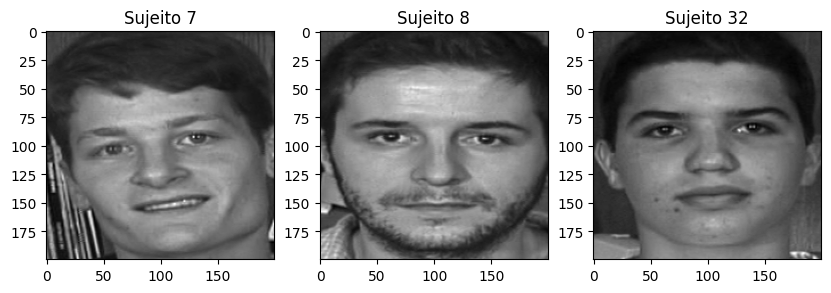

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title("Sujeito " + str(sujeitos_teste[32]))
plt.imshow(dados_teste[32], cmap="gray")

plt.subplot(1,3,2)
plt.title("Sujeito " + str(sujeitos_teste[36]))
plt.imshow(dados_teste[36], cmap="gray")

plt.subplot(1,3,3)
plt.title("Sujeito " + str(sujeitos_teste[155]))
plt.imshow(dados_teste[155], cmap="gray")

In [42]:
predicao = modelo_lbph.predict(dados_teste[32])
predicao

(7, 41.34239439502556)

In [43]:
predicao = modelo_lbph.predict(dados_teste[36])
predicao

(8, 32.3901062523144)

In [ ]:
y_pred_eigenface = []
for item in dados_teste:
    y_pred_eigenface.append(modelo_eigenface.predict(item)[0])

In [47]:
acuracia_eigenface = accuracy_score(sujeitos_teste, y_pred_eigenface)
print(f"Acurácia do modelo Eigenface: {acuracia_eigenface*100:.2f}%")

Acurácia do modelo Eigenface: 72.40%


In [48]:
y_pred_fisherfaces = []
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
print(f"Acurácia do modelo Fisherfaces: {acuracia_fisherfaces*100:.2f}%")

Acurácia do modelo Fisherfaces: 52.00%


In [49]:
y_pred_lbph = []
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
print(f"Acurácia do modelo LBPH: {acuracia_lbph*100:.2f}%")

Acurácia do modelo LBPH: 79.20%
